# Author :- Anand Kumar
## Data Science & Business Analytics Intern
## GRIP - The Spark Foundation
### Task1: Prediction  using Supervised ML
### (Predicted the precentage of marks of a student based on the number of their study hours)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

## Importing the dataset

In [2]:
data_link = "http://bit.ly/w-data"
data = pd.read_csv(data_link)

In [3]:
data.head()  #first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()  #last 5 rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape    # no. of row & columns 

(25, 2)

In [6]:
data.columns    

Index(['Hours', 'Scores'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [8]:
data.isnull().sum()  #looking for missing data

Hours     0
Scores    0
dtype: int64

In [9]:
data.describe()  #statistical information

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.corr() #Corelation between all variable

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Visualization of distribution of data

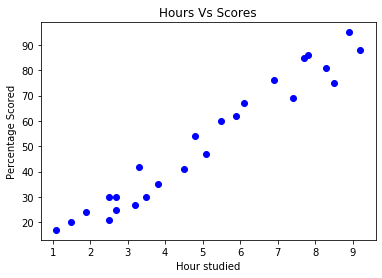

In [11]:
plt.scatter(data['Hours'], data['Scores'], color='Blue')
plt.title("Hours Vs Scores")
plt.xlabel("Hour studied")
plt.ylabel("Percentage Scored")
plt.show()

In [12]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [13]:
#print(x)

In [14]:
#print(y)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [16]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

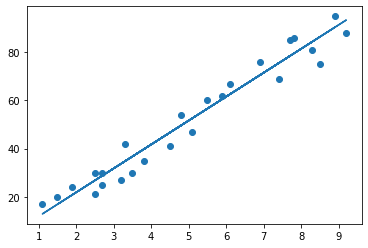

In [18]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [19]:
x_test1 = list(x_test)

In [20]:
df1 = pd.DataFrame({'Hours': x_test1, 'Actual': y_test, 'Predicted': y_pred})  
df1

,Hours,Actual,Predicted
0,[1.5],20,16.844722
1,[3.2],27,33.745575
2,[7.4],69,75.500624
3,[2.5],30,26.786400
4,[5.9],62,60.588106
5,[3.8],35,39.710582
6,[1.9],24,20.821393


### Visualizing the training and test data-set result

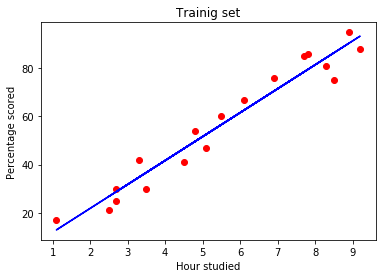

In [21]:
#PLotting the training set
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Trainig set')
plt.xlabel('Hour studied')
plt.ylabel('Percentage scored')
plt.show()

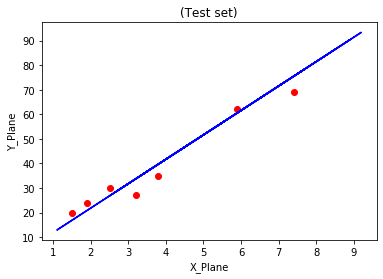

In [22]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('(Test set)')
plt.xlabel('X_Plane')
plt.ylabel('Y_Plane')
plt.show()

### Evaluating the performance of model

In [23]:
#calculating r2score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9367661043365055

### Result

In [24]:
result = regressor.predict([[9.25]])
result

array([93.89272889])

#### if a student studies for 9.25 hrs/ day,then their predicted score will be 93.89272889